
# [KDT] ch5 Linear Regression

### 단일회귀 / 다중회귀 / 특성공학
 - 데이터셋: 직장인 연봉 정보 / 보스톤집값 / 공유자전거 플랫폼 / 다이아몬드 
 - 주요 라이브러리: statsmodels ols / sklearn linear_model / sklearn train_test_split / 
 - 알파 퀴즈(1개) / 파이 퀴즈(1개) / 시그마 퀴즈(2개) / 오메가 퀴즈(과제 1개) 

In [1]:
import os
os.getcwd()

'C:\\Users\\하정수\\TIL\\Machine Learning'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')

In [8]:
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


## $\alpha$(알파) 퀴즈:
전체 소득 대비 소비액 비율을 나타내는 합성 변수('expenditure_per_salary')를 만들고자 한다. 
<br> 수식 : expenditure_per_salary = expenditure / salary 
<br> expenditure_per_salary 합성변수를 만들고 해당 변수의 Company 그룹별 평균을 구하시오 

In [26]:
df = df_hk.copy()
df['expenditure_per_salary'] = df['expenditure'] / df['salary']
df['expenditure_per_salary'].groupby(df['company']).mean()
df.groupby('company')['expenditure_per_salary'].mean()

company
A    0.765371
B    0.751797
C    0.790910
Name: expenditure_per_salary, dtype: float64


## 1-1. 단일 회귀 statemodels - ols()

연봉으로 지출액을 예측할 수 있을까 ?

In [29]:
# statemodels - ols() 클래스 호출
from statsmodels.formula.api import ols  # formula 형식
from statsmodels.formula.api import ols?

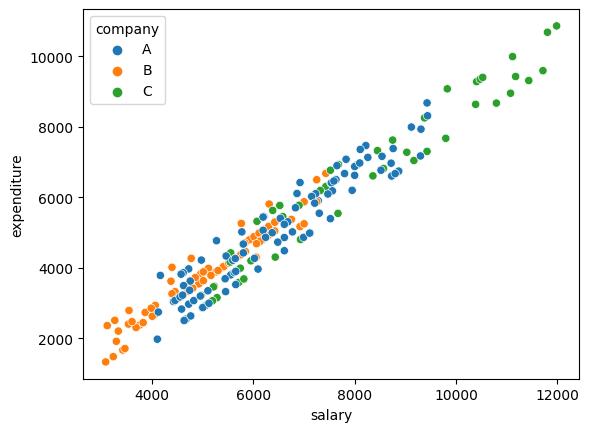

In [32]:
# 시각화 (x="salary", y="expenditure")
sns.scatterplot( x="salary", y="expenditure", data = df, hue= 'company')
plt.show()

In [31]:
# 독립변수, 종속변수 상관계수 확인
df[['expenditure', 'salary']].corr()

,expenditure,salary
expenditure,1.000000,0.972185
salary,0.972185,1.000000


In [38]:
# 모델선택, 독립변수(salary), 종속변수(expenditure) 입력, fit
from statsmodels.formula.api import ols
model1_1 = ols(formula = 'expenditure ~ salary', data = df).fit()

In [46]:
# Attribute 확인
model1_1.~~~

47312412.60387471

In [49]:
# 모델 summary 결정계수 / 회귀 계수(coef) 등 확인 
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4273.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          2.40e-158
Time:                        15:01:48   Log-Likelihood:                -1873.6
No. Observations:                 250   AIC:                             3751.
Df Residuals:                     248   BIC:                             3758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1246.9920     99.061    -12.588      0.000   -1442.100   -1051.884
salary         0.9781      0.015     65.367      0.000       0.949       1.008
==============================================================================
Omnibus:                        9.379   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.059
Skew:                          -0.130   Prob(JB):                       0.0797
Kurtosis:                       2.354   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $$y= 0.9781 \times x - 1246.9920$$

In [54]:
# model1_1 attributes (params, predict, resid 잔차)
model1_1.params, model1_1.params[0], model1_1.params[1], model1_1.resid[:5]

(Intercept   -1246.992024
 salary          0.978135
 dtype: float64,
 -1246.992024494655,
 0.9781347364827975,
 0   -788.360395
 1   -399.803932
 2     31.171143
 3    210.764994
 4    967.980531
 dtype: float64)

In [56]:
# 회귀식
def linear1_1(x):
    return(model1_1.params[1] * x + model1_1.params[0])

In [57]:
# sample data
df[:2]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237


In [58]:
# 회귀식으로 예측값 확인
linear1_1(df[:2]['salary'])

0    2763.360395
1    3369.803932
Name: salary, dtype: float64

In [60]:
# sample data
df[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,0.811126
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,0.722906
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,0.914579


In [68]:
# predict로 예측값 확인
predict1_1 = model1_1.predict(exog=df['salary'])

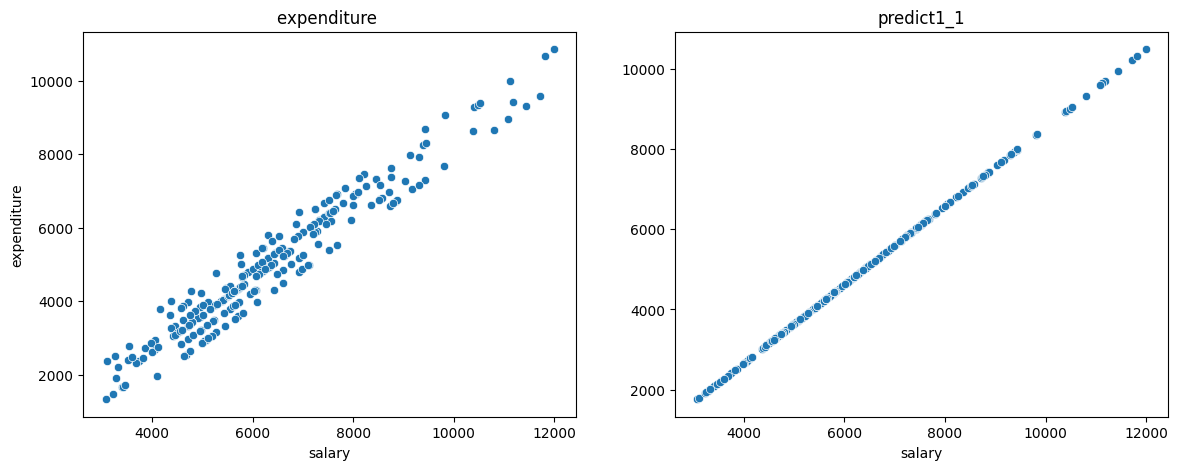

In [71]:
# 시각화 

fig, ax = plt.subplots( nrows= 1, ncols=2, figsize=(14, 5))
sns.scatterplot(x=df['salary'], y=df['expenditure'], palette='Set1', ax=ax[0])
sns.scatterplot(x=df['salary'], y=predict1_1, palette='Set2', ax=ax[1])

ax[0].set_title('expenditure ')
ax[1].set_title('predict1_1')
plt.show()

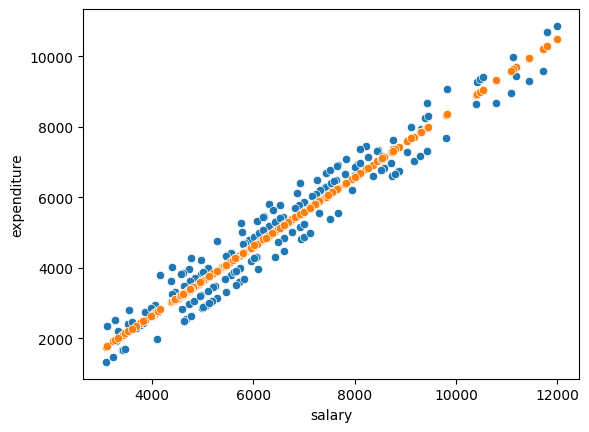

In [75]:
sns.scatterplot(x=df['salary'], y=df['expenditure'])
sns.scatterplot(x=df['salary'], y=predict1_1)
plt.show()

## 다중 회귀 가정 4가지 선형성, 정규성, 등분산, 독립성

### 선형 회귀 가정 1: 선형성 

F 검정의 pvalue로 확인

<AxesSubplot: xlabel='salary'>

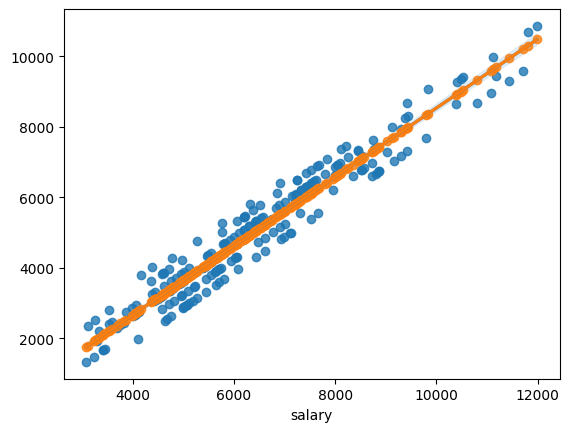

In [73]:
# 선형회귀 그래프, regplot: scatter plot, regression line, confidence band를 한 번에 그리는 기능
sns.regplot(x='salary', y='expenditure', data=df)
sns.regplot(x=df['salary'], y=predict1_1)

In [78]:
# F 검정의 pvalue로 확인
model1_1.f_pvalue
model1_1.f_pvalue < 0.05

True

### 선형 회귀 가정 2: 잔차의 정규성

<br>잔차 그래프로 확인
<br>shapiro 의 경우 p값이 0.05 이상이면 정규성 만족한다 

In [81]:
# 잔차 계산
residual = df['expenditure'] - predict1_1
residual

0     -788.360395
1     -399.803932
2       31.171143
3      210.764994
4      967.980531
          ...    
245   -725.169784
246   -722.545952
247     46.914133
248     63.531733
249     35.325543
Length: 250, dtype: float64

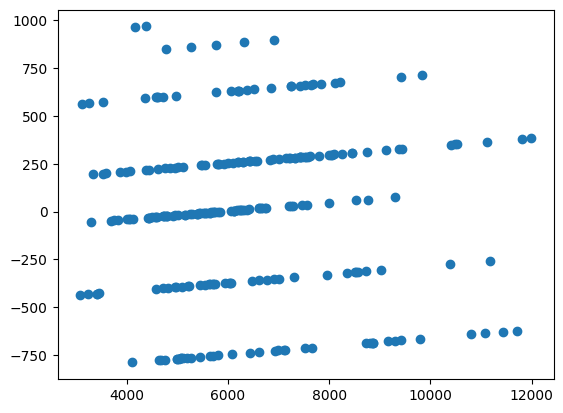

In [82]:
# 잔차 그래프 1
plt.scatter(df['salary'], residual)
plt.show()

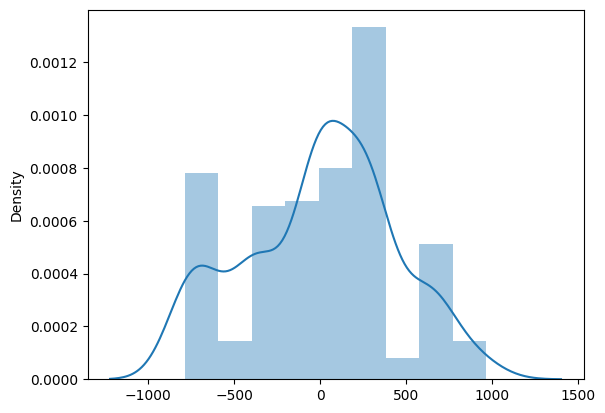

In [83]:
# 잔차 그래프 2
sns.distplot(residual)
plt.show()

In [88]:
# shapiro 정규성 검정, Ho: 정규성을 가진다 (p-value > 0.05)
from scipy.stats import shapiro

shapiro(residual)

ShapiroResult(statistic=0.9549193382263184, pvalue=5.075988269709342e-07)

In [89]:
# pvalue가 0.05보다 작으면 정규성 만족 못함
shapiro(residual)[1] < 0.05

True

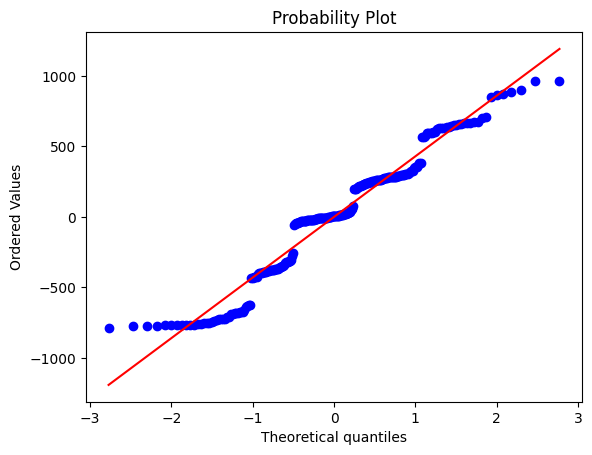

In [90]:
# residual이 그룹화 되어 있어 shapiro test에서 정규성이 안 나옴

import scipy.stats as stats

stats.probplot(residual, plot=plt)
plt.show()

## 선형 회귀 가정 3: 잔차의 등분산

예측값과 잔차의 산점도로 파악

<AxesSubplot: >

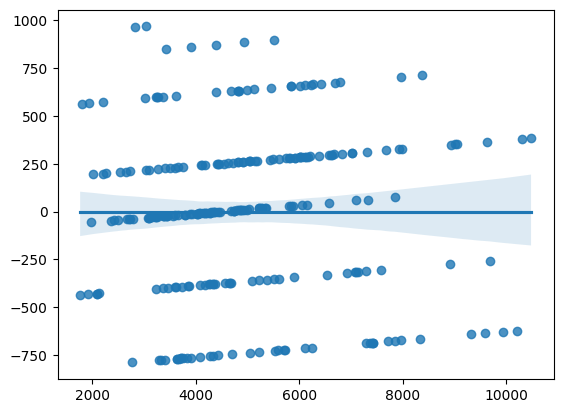

In [91]:
# 잔차그래프로 확인, X가 커질때 잔차의 간격이 변하면 안됨, 간격아 일정하면 등분산성 만족
sns.regplot(x=predict1_1, y=residual)

## 선형 회귀 가정 4: 잔차의 독립성
잔차가 독립인지(자기상관성이 있는지) 검정

In [92]:
#perform Durbin-Watson test

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model1_1.resid)

# 더빈 왓슨 통계량은 0 ~ 4사이의 값을 갖을 수 있음
# 0에 가까울수록 → 양의 상관관계
# 4에 가까울수록 → 음의 상관관계
# 2에 가까울수록 → 오차항의 자기상관이 없음

1.8401707978491966

## 1-2. 단일 회귀 sklearn.linear_model

연봉으로 지출액을 예측할 수 있을까 ?

In [99]:
# LinearRegression 호출
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression?

In [102]:
df['salary']

0      4100
1      4720
2      7280
3      4060
4      4390
       ... 
245    6990
246    7110
247    8000
248    8760
249    7470
Name: salary, Length: 250, dtype: int64

In [103]:
df[['salary']]

,salary
0,4100
1,4720
2,7280
3,4060
4,4390
...,...
245,6990
246,7110
247,8000
248,8760


In [105]:
# 모델선택, 독립변수(salary), 종속변수(expenditure) 입력, fit 

model1_2 = LinearRegression(fit_intercept=True).fit(X=df[['salary']], y=df['expenditure'])

In [109]:
# 회귀계수 확인
model1_2.coef_

array([0.97813474])

In [110]:
# intercept_ 확인
model1_2.intercept_

-1246.9920244946543

## $$y= 0.97813 \times x - 1246.9920$$

In [114]:
# 회귀식
def linear1_2(x):
    return (model1_2.coef_[0] * x) + model1_2.intercept_

In [111]:
# sample data
df[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,0.481707
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,0.629237
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,0.811126
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,0.722906
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,0.914579


In [116]:
# 회귀식으로 예측
linear1_2(df['salary'][:5])

0    2763.360395
1    3369.803932
2    5873.828857
3    2724.235006
4    3047.019469
Name: salary, dtype: float64

In [123]:
# predict로 예측
predict1_2 = model1_2.predict(df[['salary']])
predict1_2[:5]

array([2763.36039508, 3369.8039317 , 5873.8288571 , 2724.23500563,
       3047.01946866])

<AxesSubplot: xlabel='salary'>

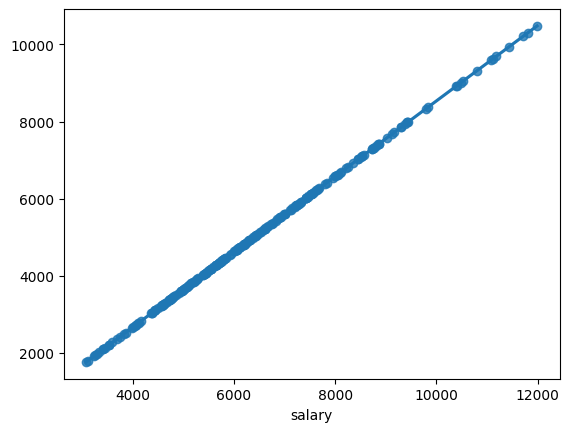

In [124]:
# 선형회귀 그래프
sns.regplot(x=df['salary'], y=predict1_2)

## statemodels vs. sklearn 비교 
 - statemodels는 통계기반 강점, summary 표등 통계자료 보기 편함 
 - sklearn는 머신러닝 관점
 - 입력값의 차이( statemodels ols의 경우 formula 문법이 있음 / sklearn는 fit() 활용) 

In [ ]:
# statemodels vs. sklearn 제공 기능 비교

# model1_1.   # 통계 중심
# model1_2.   # 머신러닝 중심

## 1-3. 단일 회귀 train_test_split / statemodels - ols()

train, test data 분할 (train_size= 0.7, random_state=123)
<br> 연봉으로 지출액을 예측할 수 있을까 ?

In [129]:
# train_test_split (train_size= 0.7, random_state=123)
from sklearn.model_selection import train_test_split
df_train1, df_test1 = train_test_split(df, train_size=0.7, random_state=123)
print('데이터셋 총합 :', len(df), ', df_train :', len(df_train1), ', df_test :', len(df_test1))
df_train1[:5]

데이터셋 총합 : 250 , df_train : 175 , df_test : 75


,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
193,hkd48,780113-1,M,184.0,43,AB,A,C,6530,5405,0.827718
243,hkd93,730719-1,M,180.4,48,AB,A,B,7560,6185,0.818122
152,hkd236,860621-1,M,166.2,35,A,C,B,10410,9285,0.891931
184,hkd4,960809-1,M,177.6,25,O,A,B,4450,3075,0.691011
190,hkd45,811022-1,M,182.1,40,B,A,C,5800,4675,0.806034


In [133]:
# ols 모델링, fit
from statsmodels.formula.api import ols
model1_3 = ols(formula='expenditure ~ salary', data = df_train1).fit()
model1_3

In [136]:
# summary, 회귀계수 확인
model1_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3453.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          3.14e-116
Time:                        16:31:22   Log-Likelihood:                -1306.3
No. Observations:                 175   AIC:                             2617.
Df Residuals:                     173   BIC:                             2623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1278.0961    110.539    -11.562      0.000   -1496.275   -1059.917
salary         0.9799      0.017     58.760      0.000       0.947       1.013
==============================================================================
Omnibus:                        5.448   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.336
Skew:                          -0.140   Prob(JB):                        0.189
Kurtosis:                       2.385   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $$y= 0.9799 \times x - 1278.0961$$

In [139]:
# model1_3 과 model1_1.summary()와 비교, coef_, R-squared, train data set이 바뀌었음
model1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4273.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          2.40e-158
Time:                        16:32:27   Log-Likelihood:                -1873.6
No. Observations:                 250   AIC:                             3751.
Df Residuals:                     248   BIC:                             3758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1246.9920     99.061    -12.588      0.000   -1442.100   -1051.884
salary         0.9781      0.015     65.367      0.000       0.949       1.008
==============================================================================
Omnibus:                        9.379   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.059
Skew:                          -0.130   Prob(JB):                       0.0797
Kurtosis:                       2.354   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
# 회귀식 y = 0.9799 * salary - 1278.0961

model1_3.params[1] * 7520 + model1_3.params[0]
#0.9799 * 5620 - 1278.0961

6090.600256122475

In [145]:
# predict로 예측
model1_3.predict(df_test1[['salary']])

127    6090.600256
187    4228.828570
24     4268.023763
206    2798.204010
235    4258.224965
          ...     
128    5512.471153
132    7119.474083
167    5355.690380
217    3258.747533
50     3542.912685
Length: 75, dtype: float64

## 1-4. $\pi$(파이) Quiz 단일회귀 train_test_split / statemodels - ols() 


<br>나이로 연봉을 예측할 수 있을까 ? 
<br>독립변수: 나이(age)
<br>종속변수: 연봉(salary)

<br>1. train, test data 분할하시오(train_size= 0.7, random_state=123)
<br>2. 회귀식을 수립하시오
<br>3. 37세의 연봉을 예측하시오

In [148]:
# train_test_split (train_size= 0.7, random_state=123)
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

In [149]:
# ols모델링, fit
from statsmodels.formula.api import ols
model1_4 = ols(formula='salary ~ age', data=df_train1).fit()

In [151]:
# summary, 회귀계수 확인
model1_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     67.46
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.83e-14
Time:                        16:37:46   Log-Likelihood:                -1543.0
No. Observations:                 175   AIC:                             3090.
Df Residuals:                     173   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1821.4088    564.336      3.228      0.001     707.539    2935.278
age          115.2576     14.033      8.213      0.000      87.559     142.956
==============================================================================
Omnibus:                       56.938   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.516
Skew:                           1.578   Prob(JB):                     1.66e-24
Kurtosis:                       5.249   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $$y= 115.2576 \times x + 1821.4088$$

In [ ]:
# 회귀식으로 예측 y = 115.2576 * age + 1821.4088
115.2576 * ? + 1821.4088
115.2576 * ? + 1821.4088

In [158]:
model1_4.params[1]*37 + model1_4.params[0]

6085.940191437446

In [ ]:
# predict 개별값 입력으로 예측


In [179]:
a = pd.DataFrame({'age':[37]})
model1_4.predict(a)

0    6085.940191
dtype: float64

In [185]:
b = pd.DataFrame([37], columns=['age'])
model1_4.predict(b)

0    6085.940191
dtype: float64

In [190]:
# predict 전체값 예측
predict1_4 = model1_4.predict(df_test1['age'])

127    5279.136947
187    6085.940191
24     6201.197798
206    4933.364127
235    6546.970617
          ...     
128    5394.394553
132    5855.424979
167    7123.258649
217    5048.621734
50     5970.682585
Length: 75, dtype: float64

<AxesSubplot: xlabel='age', ylabel='salary'>

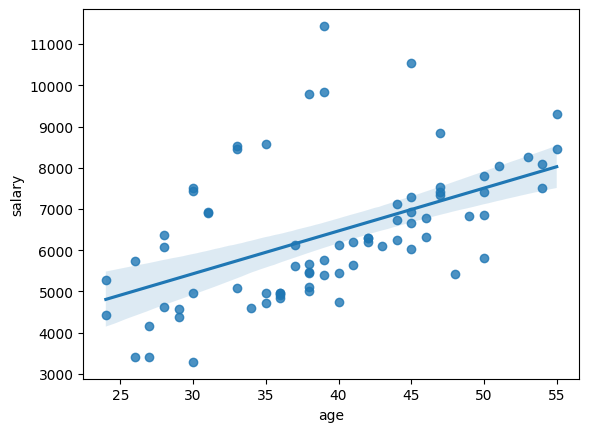

In [186]:
# 선형회귀 그래프
sns.regplot(x='age', y='salary', data=df_test1)

## 1-5.  $\pi$(파이) Quiz 단일회귀 train_test_split /  sklearn.linear_model


<br>나이로 연봉을 예측할 수 있을까 ?  
<br>독립변수: 나이(age)
<br>종속변수: 연봉(salary)

train, test data 분할하고 37세의 연봉을 예측하시오

In [191]:
# train_test_split (train_size= 0.7, random_state=123)
df_train1, df_test1 = train_test_split(df, train_size= 0.7, random_state=123)

In [200]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
model1_5 = LinearRegression().fit(X = df_train1[['age']], y = df_train1['salary'])
model1_5

LinearRegression()

In [198]:
a = pd.DataFrame({'age':[37]})
model1_5.predict(a)

array([6085.94019144])

In [202]:
predict1_5 = model1_5.predict(df_test1[['age']])
predict1_5[:5]

array([5279.13694659, 6085.94019144, 6201.19779784, 4933.36412737,
       6546.97061706])

## 1-6. 단일회귀 train_test_split /  statsmodels.api 

In [205]:
# statsmodels.api
import statsmodels.api as sm
from statsmodels.formula.api import ols

sm.OLS?

# train, fit
model_sm = sm.OLS(endog = df_train1['salary'], exog = sm.add_constant(df_train1[['age']])).fit()
# model_sm = sm.OLS(endog = df_train1['salary'], exog = df_train1[['age']]).fit() -> 상수항 없는 경우
model_sm

In [208]:
# predict
predict_sm = model_sm.predict(sm.add_constant(df_test1[['age']]))

In [206]:
# summary()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     67.46
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.83e-14
Time:                        17:17:29   Log-Likelihood:                -1543.0
No. Observations:                 175   AIC:                             3090.
Df Residuals:                     173   BIC:                             3096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1821.4088    564.336      3.228      0.001     707.539    2935.278
age          115.2576     14.033      8.213      0.000      87.559     142.956
==============================================================================
Omnibus:                       56.938   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.516
Skew:                           1.578   Prob(JB):                     1.66e-24
Kurtosis:                       5.249   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2-1. 다중회귀 statemodels -ols()

연봉과 나이로 지출액을 예측할 수 있을까
<br> train, test data 분할
<br> 종속변수 : 지출액 (expenditure)
<br> 독립변수 : 연봉과 나이 (age , salary)

In [218]:
# ols 다중회귀 모델링, fit
model2_1 = ols(formula='expenditure~age+salary', data=df_train1).fit()
model2_1

In [219]:
# summary
model2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1853.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          4.36e-117
Time:                        17:26:13   Log-Likelihood:                -1299.9
No. Observations:                 175   AIC:                             2606.
Df Residuals:                     172   BIC:                             2615.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1633.1811    145.299    -11.240      0.000   -1919.980   -1346.382
age           14.9256      4.137      3.608      0.000       6.760      23.091
salary         0.9436      0.019     49.632      0.000       0.906       0.981
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.495
Skew:                          -0.073   Prob(JB):                        0.474
Kurtosis:                       2.571   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
# attribute 확인
model2_1.params

Intercept   -1633.181087
age            14.925566
salary          0.943551
dtype: float64

## $$y= 14.9256 \times x_1  + 0.9436 \times x_2 - 1633.1811$$

In [220]:
df_test1.head(1)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure,expenditure_per_salary
127,hkd213,910216-2,F,158.3,30,B,C,C,7520,6770,0.900266


In [221]:
# 회귀식, hkd213에 대입 나이 30 / 연봉 7520
14.9256 * 30 + 0.9436 * 7520 - 1633.1811

5910.4589000000005

In [226]:
# predict 예측
predict2_1 = model2_1.predict(exog=df_test1[['age', 'salary']])
predict2_1[:5]

127    5910.092828
187    4221.824034
24     4274.491658
206    2694.983249
235    4309.832843
dtype: float64

In [228]:
# attribute로 확인
model2_1.params, model2_1.params[0], model2_1.params[1], model2_1.params[2]

(Intercept   -1633.181087
 age            14.925566
 salary          0.943551
 dtype: float64,
 -1633.1810866712706,
 14.9255664563031,
 0.9435514522157465)

In [230]:
# 회귀식에 attribute값 대입, (나이 30 / 연봉 7520)
model2_1.params[1] * 30 + model2_1.params[2] * 7520 + model2_1.params[0]

5910.092827680237

## 다중회귀 2-2 sklearn.linear_model 

<br> 연봉과 지출액으로 나이를 예측할 수 있을까
<br> train, test data 분할
<br> 독립변수: salary, expenditure
<br> 종속변수: age

In [265]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression
model2_2 = LinearRegression().fit(X = df_train1[['salary', 'expenditure']], y = df_train1[['age']])
model2_2
predict2_2 = model2_2.predict(X=df_test1[['salary', 'expenditure']])
predict2_2[:5]

array([[45.29627698],
       [35.77791435],
       [37.64667625],
       [38.56708813],
       [34.08616908]])

In [255]:
# intercept_, coef_확인
model2_2.intercept_, model2_2.coef_, model2_2.feature_names_in_

(array([29.81485204]),
 array([[-0.00218482,  0.00471363]]),
 array(['salary', 'expenditure'], dtype=object))

In [262]:
# 변수별 회귀계수 확인하는 데이터프레임
pd.DataFrame({'feature': model2_2.feature_names_in_, 'coef':[-0.00218482,  0.00471363] })

,feature,coef
0,salary,-0.002185
1,expenditure,0.004714


## 2-3 선형회귀 모형 명목형 변수의 처리
get_dummy ('gender', 'blood_type', 'company', 'grades')

In [267]:
# 해당 column만 get_dummies
df[['gender', 'blood_type', 'company', 'grades']][:5]

,gender,blood_type,company,grades
0,F,A,A,A
1,F,A,A,B
2,F,A,A,B
3,F,AB,B,B
4,M,O,B,F


In [276]:
pd.get_dummies(data=df[['gender', 'company']])[:5]

,gender_F,gender_M,company_A,company_B,company_C
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,0,1,0
4,0,1,0,1,0


In [273]:
# 전체 column + 해당 column, 원본 column은 삭제됨
pd.get_dummies(data=df, columns=['gender', 'company'], drop_first=True)[:5]

,name,jumin7,height,age,blood_type,grades,salary,expenditure,expenditure_per_salary,gender_M,company_B,company_C
0,hkd1,990623-2,161.9,22,A,A,4100,1975,0.481707,0,0,0
1,hkd10,900303-2,169.4,31,A,B,4720,2970,0.629237,0,0,0
2,hkd100,681205-2,168.3,55,A,B,7280,5905,0.811126,0,0,0
3,hkd101,931226-2,155.3,28,AB,B,4060,2935,0.722906,0,1,0
4,hkd102,920123-1,188.6,29,O,F,4390,4015,0.914579,1,1,0


## 2-4 다중회귀 sklearn.linear_model 

회사와(company, 범주형) 연봉(salary, 연속형)으로 지출액(expenditure)을 예측할 수 있을까 ?

In [ ]:
# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression


In [ ]:
# attribute 확인(coef, intercept)


In [ ]:
# feature, coef DataFrame화


## $$y= -30.55 \times x_1  + 177.91 \times x_2 -147.36 \times x_3 + 1.01 \times x_4 - 1503.1087$$

## 3-1 선형회귀 모델의 평가

MSE, RMSE, MAE, RMAE

In [ ]:
# df_train1, df_test1


In [ ]:
# 평가를 위한 시각화 (x='salary', y='expenditure')
sns.regplot(x='salary', y='expenditure', data=df_train1) # 평가는 회귀식과 실제값이 잘 맞는가

In [ ]:
# 평가를 위한 시각화 (x='age', y='expenditure')
sns.regplot(x='age', y='expenditure', data=df_train1)  # 그래프로 보면 age가 불리해 보임

In [ ]:
# LinearRegression (salary, expenditure)
from sklearn.linear_model import LinearRegression


In [ ]:
# LinearRegression (age, expenditure)
from sklearn.linear_model import LinearRegression


In [ ]:
# predict_salary 시각화
sns.regplot(x=predict_salary, y=df_test1['expenditure'])

In [ ]:
# predict_age 시각화
sns.regplot(x=predict_age, y=df_test1['expenditure'])

In [ ]:
# LinearRegression 평가를 위한 class
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Mean Absolute Error(MAE) : $$\frac{1}{N}\sum_{i=1}^{n}|x_i-y_i|$$

In [ ]:
# Mean Absolute Error(MAE) 계산식


In [ ]:
# mean_absolute_error class 활용 (predict_salary)


In [ ]:
# mean_absolute_error class 활용 (predict_age)


### Mean Squared Error(MSE): $$\frac{1}{N}\sum_{i=1}^{n}(x_i-y_i)^2$$

In [ ]:
# Mean Squared Error(MSE) 계산식


In [ ]:
# mean_squared_error  class 활용 (predict_salary)


In [ ]:
# mean_squared_error  class 활용 (predict_age)


### Root Mean Squared Error(RMSE):
$$\sqrt{\frac{1}{N}\sum_{i=1}^{n}(x_i-y_i)^2 }$$

In [ ]:
# Root Mean Squared Error(RMSE) 계산식


In [ ]:
# RMSE (mean_squared_error 활용) (predict_salary)


In [ ]:
# RMSE (mean_squared_error 활용) (predict_age)


## 3-2 정규화, 표준화 

표준화 : min-max 단위를 고르게 하기 위하여 모든 값을 0~1사이로 바꾸는 것 
<br> sklearn.preprocessing / MinMaxScaler 활용

$$Y = \frac{( X - X_{min} )}{( X_{max} - X_{min} )} $$

In [ ]:
# MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 대상변수 선택 (수치형) 'height', 'age', 'salary', 'expenditure'


In [ ]:
# MinMaxScaler 모델링


In [ ]:
# MinMaxScaler fit, transform


In [ ]:
# 시각화 

fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

ax[0].set_title('original ')
ax[1].set_title('minmax')

df_n.plot.hist(ax= ax[0] )
df_minmax.plot.hist(ax= ax[1] )
plt.show()

### 정규화

정규화: StandardScaler 모든 변수의 값을 평균이 0이고 분산이 1인 정규 분포로 변환
<br> sklearn.preprocessing / MinMaxScaler 활용

$$Z = \frac{ X - \mu }{\sigma} $$

In [ ]:
# StandardScaler class
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler 모델링


In [ ]:
# StandardScaler fit, transform


In [ ]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=3, figsize=(14, 5))

sns.histplot(x='salary', data=df, ax= ax[0])
sns.histplot(x='salary', data=df_minmax, ax= ax[1], color='green')
sns.histplot(x='salary', data=df_stan, ax= ax[2], color='orange')

ax[0].set_title('df salary histplot')
ax[1].set_title('df_minmax salary histplot')
ax[2].set_title('df_stan salary histplot')
plt.show()

In [ ]:
# StandardScaler class
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler 모델링


In [ ]:
# StandardScaler fit, transform


### 정규화, train, test분리시 적용

- train으로 정규화 모델을 만들었을때
- test도 train 정규화 모델을 사용해야 같은 scale로 scaling된다

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split


In [ ]:
# 연속형 변수 추출


In [ ]:
# train data StandardScaler fit까지로 StandardScaler를 만든다
from sklearn.preprocessing import StandardScaler


In [ ]:
# train에 대해 transform을 실행하여 train data를 StandardScaling


In [ ]:
# test data는 traind의 StandardScaler를 적용해 transform


In [ ]:
# train data df화


In [ ]:
# test data df화


In [ ]:
# train data EDA


In [ ]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

ax[0].set_title('train ')
ax[1].set_title('test')

df_train_std.plot.hist(ax= ax[0] )
df_test_std.plot.hist(ax= ax[1] )
plt.show()

## 4-1 Feature Engeering

변수 선택

- 종속변수(expenditure)

- 독립변수 수치형 변수중 회귀계수가 높은 2개 선정 (feature selection) 하시오
- 독립변수 수치형 변수중 t검정 통계량의 p-value가 0.05이하인것을 선정하시오


In [ ]:
# ols 방식
#종속변수: 소비액 / 독립변수: 신장 / 나이 / 연봉 
from statsmodels.formula.api import ols

# LinearRegression 방식
from sklearn.linear_model import LinearRegression


## 4-2 Feature Engeering

보스톤 집값 데이터 셋(출처: sklearn 라이브러리) 

데이터(sklearn_boston.csv) 사이즈 : 506 X 14
<br> 
<br> <b>crim:</b> 자치시 별 1인당 범죄율
<br> <b>zn:</b> 25,000 평방피트 초과하는 거주지역 비율
<br> <b>indus:</b> 비소매상업지역 점유하고 있는 토지 비율 
<br> <b>chas:</b> 찰스강에 대한 더미 변수(강 경계 1, 아니면 0) 
<br> <b>nox:</b> 10ppm 당 농축 일산화 질소
<br> <b>rm:</b> 주택 1가구당 평균 방의 개수 
<br> <b>age:</b> 1940년 이전 건축된 소유주택 비율
<br> <b>dis:</b> 5개 보스턴 직업센터까지의 접근성 지수 
<br> <b>rad:</b> 방사형 도로까지의 접근성 지수 
<br> <b>tax:</b> 10,000 달러 당 재산세 율
<br> <b>ptratio:</b> 자치시 별 학생 / 교사 비율 
<br> <b>b:</b> 자치시별 흑인의 비율 
<br> <b>lstat:</b> 모집단 하위계층 비율 
<br> <b>price:</b> 본인 소유 주택 가격 

<br> 1. 종속변수 : price
<br> 2. 독립변수 : price를 제외한 모든 변수
<br> 3. feature selection을 통해 p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택하시오
<br> ------------------------------------------------------------------------------------------
<br> 4. train, test 분리하여 다음을 수행 (train_size=0.8, random_state=123)
<br> 5. 선택된 독립변수를 사용하여 선형회귀식을 만들고 RMSE를 구하시오 

In [ ]:
# 파일 로드 
boston = pd.read_csv('.\\data\\sklearn_boston.csv')
boston

In [ ]:
boston.info()

In [ ]:
# step1) 변수 생성
boston.columns

In [ ]:
# join
' + '.join(boston.columns)
'A' + ' + '.join(boston.columns.drop('price'))
'price ~ ' + ' + '.join(boston.columns.drop('price'))

In [ ]:
'price ~ ' + ' + '.join(boston.columns.drop('price'))

In [ ]:
# step2) formula 생성


In [ ]:
# step3) feature selection을 통해 p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택하시오
# ols, fit, summary
from statsmodels.formula.api import ols


In [ ]:
# p-value 값 0.05 미만 / coef 절대값 0.5이상인 변수를 선택


In [ ]:
# step4) train, test 분리(train_size=0.8, random_state=123)



In [ ]:
# formula 생성


In [ ]:
# step5) 선택된 독립변수를 사용하여 선형회귀식 생성
from statsmodels.formula.api import ols


In [ ]:
# summary


In [ ]:
# step5) RMSE


## 4-3 Feature Engeering - 다중 공선성 VIF

In [ ]:
boston

In [ ]:
# 상관관계 분석
boston.corr()

In [ ]:
# 상관관계 매트릭스 시각화 
plt.figure( figsize=(10, 10))
sns.heatmap(boston.corr(), annot=True , cbar=True)
plt.show()

In [ ]:
#다중 공선성 VIF 구하기 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(boston.values, i) for i in range(boston.shape[1])]
vif["features"] = boston.columns
vif.sort_values('VIF Factor', ascending = False)

##  $\Sigma$ (시그마) Quiz

### quiz 1) 자전거공유플랫폼 데이터 셋 활용

□ df_bike.csv 파일을 읽고 (데이터 객체명 : df_bike)
train, test로 분리하시오 (random_state=123)

  - sklearn.model_selection / train_test_split 메소드를 쓸 것(데이터셋은 df_bike_train, df_bike_test로 명명)

  1_1. df_bike_train내 대여건수인 'riders' 변수와 'temp', 'feelslike', 'humidity', 'windspeed', 'casual'
    <br> 간 pearson 상관계수를 확인, 'riders' 변수와 비교해 가장 상관계수 절대값이 큰 변수를 구하시오

- df_bike_train으로 자건거 대여건수(riders)와 'temp'변수와 단일 회귀분석을 실시하고 

  1_2. 회귀계수를 구하시오

  1_3. df_bike_test의 대여건수를 예측(pred_count)하고, 예측치의 중앙값을 구하시오

  1_4. df_bike_test의 대여건수 예측치(pred_count)와 실제값(riders)의 RMSE를 구하시오

  1_5. df_bike_train의 자건거 대여건수(riders)를 종속변수로 하고, 'temp', 'feelslike', 'humidity', 'windspeed', 'casual'
  
    5개 독립변수로 다중 회귀분석을 하고자 한다.
    
    
    이때 해당 모델의 결정계수를 구하고 통계적으로 유의미한 변수와 해당변수의 회귀값을 구하시오  

** bike dataset 설명
https://www.scikit-yb.org/en/latest/api/datasets/bikeshare.html

In [ ]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\yellowbrick_bikeshare.csv')

# # 데이터 분리 
from sklearn.model_selection import train_test_split
df_bike_train, df_bike_test = train_test_split(df_bike, train_size= 0.7, random_state=123)
print('df', len(df_bike), 'df_bike_train', len(df_bike_train), 'df_bike_test', len(df_bike_test))

df_bike_train[['riders', 'temp', 'feelslike', 'humidity', 'windspeed', 'casual']].corr().abs().sort_values('riders', ascending=False)
# casual, 0.695529

In [ ]:
# 관련 메소드 호출
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 1_2. 모델 Training, 회귀계수 (statemodels)

# # OLS 모델, 1_2. 모델 Training, 회귀계수 (statemodels)

# 1_2. 모델 Training, 회귀계수 (sklearn)    
from sklearn.linear_model import LinearRegression

# 1_3. df_bike_test 예측치의 중앙값을 구하시오

# 1_4. df_bike_test pred_count와 count의 RMSE

# 1_5. feature selection


## quiz 2) 다이아몬드 데이터 셋 활용

- diamond.csv 파일을 읽고 (df_dia)
train, test로 분리하시오 (random_state=123) (df_dia_train, df_dia_test)

- df_dia_train으로 선형회귀분석을 실시하고 아래에 답하시오

  2_1. 종속변수(price), 독립변수(carat, depth)일때 독립변수의 회귀계수를 구하시오

  2_2. 종속변수(price), 독립변수(carat, depth, color)일때 df_dia_test price의 예측값 평균을 구하시오

    'color'는 더미변수로 변형하고 가변수를 생성시 마지막 변수 하나를 제거하시오 

  2_3. 2_2 조건으로 df_dia_test의 값이 (carat: 1, color: 'E' , depth: 50)일때 price 예측값을 구하시오 

** dia dataset 설명 https://www.kaggle.com/datasets/shivam2503/diamonds

In [ ]:
# 파일 로딩 
df_dia = pd.read_csv('.\\data\\diamonds.csv')

# 데이터 분리 
from sklearn.model_selection import train_test_split
df_dia_train, df_dia_test = train_test_split(df_dia, train_size= 0.7, random_state=123)
print('df', len(df_dia), 'df_dia_train', len(df_dia_train), 'df_dia_test', len(df_dia_test))
df_dia.head(5)

In [ ]:
# 관련 메소드 호출
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# 2_1. 모델 Training, 회귀계수 (statemodels)

# 2_1. 모델 Training, 회귀계수 (sklearn)    
# X, y값 세팅

# 2_2. 범주형 data 가변수화  

# 데이터 분리 
from sklearn.model_selection import train_test_split

# X, y값 세팅  ['carat', 'depth', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I'] ['price']

# LinearRegression, fit, predict
from sklearn.linear_model import LinearRegression

# 2_2. answer (mean)

# 2_3. 독립변수 직접입력 방식
# df_dia_test(carat: 1, depth: 50, color: 'E'  )일때 price 예측값

# 2_3. answer 


## $\Omega$(오메가) Quiz

- yellowbrick_bikeshare.csv 파일을 읽고 (객체명 : df_bike)

  3-1 season column을 사용하여 여름(df_bike_summer)과 겨울(df_bike_winter)로 구분하시오

  3_2 df_bike_summer, df_bike_winter를  train, test로 분리하시오 (df_summer_tr, df_summer_te, df_winter_tr, df_winter_te, random_state=123 )

  3_3. statemodels를 사용하여 종속변수(riders), 독립변수(temp)로 train 시키고 여름과 겨울의 RMSE차이를 구하시오

In [ ]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\yellowbrick_bikeshare.csv')

# 3-1 데이터 분리

# 3-2 train, test 분리

from sklearn.model_selection import train_test_split

# 3-3 train, predict
from statsmodels.formula.api import ols


# 3-3 RMSE


In [ ]:
#시각화 
fig, ax = plt.subplots( nrows= 1 , ncols=2, figsize=(14, 5))

sns.regplot(x='temp', y='riders', data=df_summer_tr, ax= ax[0], color='green')
sns.regplot(x='temp', y='riders', data=df_winter_tr, ax= ax[1])

ax[0].set_title('df_summer_tr')
ax[1].set_title('df_winter_tr')
plt.show()